In [61]:
import pandas as pd
import numpy as np
import seaborn as sborn
import matplotlib.pyplot as plt
import glob

**For Operating system Interactions**

In [2]:
import os

In [3]:
os.listdir(r"..\..\Datasets\uber_pickup_nyc")

['other-American_B01362.csv',
 'other-Carmel_B00256.csv',
 'other-Dial7_B00887.csv',
 'other-Diplo_B01196.csv',
 'other-Federal_02216.csv',
 'other-FHV-services_jan-aug-2015.csv',
 'other-Firstclass_B01536.csv',
 'other-Highclass_B01717.csv',
 'other-Lyft_B02510.csv',
 'other-Prestige_B01338.csv',
 'other-Skyline_B00111.csv',
 'Uber-Jan-Feb-FOIL.csv',
 'uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-janjune-15_sample.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [69]:
file_path = "..\\..\\Datasets\\uber_pickup_nyc\\"

In [130]:
uber_files_list = glob.glob(file_path + 'uber-raw*.csv')

In [131]:
ignore_files= glob.glob(file_path + '*sample*.csv')
ignore_files

['..\\..\\Datasets\\uber_pickup_nyc\\uber-raw-data-janjune-15_sample.csv']

In [132]:
for file in ignore_files:
    if file in uber_files_list:
        uber_files_list.remove(file)
        


In [133]:
uber_files_list

['..\\..\\Datasets\\uber_pickup_nyc\\uber-raw-data-apr14.csv',
 '..\\..\\Datasets\\uber_pickup_nyc\\uber-raw-data-aug14.csv',
 '..\\..\\Datasets\\uber_pickup_nyc\\uber-raw-data-janjune-15.csv',
 '..\\..\\Datasets\\uber_pickup_nyc\\uber-raw-data-jul14.csv',
 '..\\..\\Datasets\\uber_pickup_nyc\\uber-raw-data-jun14.csv',
 '..\\..\\Datasets\\uber_pickup_nyc\\uber-raw-data-may14.csv',
 '..\\..\\Datasets\\uber_pickup_nyc\\uber-raw-data-sep14.csv']

In [134]:
uber_file = pd.DataFrame(uber_files_list, columns= ['filepath'])

In [135]:
uber_file

,filepath
0,..\..\Datasets\uber_pickup_nyc\uber-raw-data-a...
1,..\..\Datasets\uber_pickup_nyc\uber-raw-data-a...
2,..\..\Datasets\uber_pickup_nyc\uber-raw-data-j...
3,..\..\Datasets\uber_pickup_nyc\uber-raw-data-j...
4,..\..\Datasets\uber_pickup_nyc\uber-raw-data-j...
5,..\..\Datasets\uber_pickup_nyc\uber-raw-data-m...
6,..\..\Datasets\uber_pickup_nyc\uber-raw-data-s...


In [141]:
uber_file.drop(columns = ['filename'], inplace =True)

In [142]:
uber_file[uber_file['filepath'].str.contains('janjune-15')]

,filepath
2,..\..\Datasets\uber_pickup_nyc\uber-raw-data-j...


In [149]:
uber_15 = pd.read_csv(uber_file[uber_file['filepath'].str.contains('janjune-15')].iloc[0]['filepath'])

In [150]:
uber_15

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90
...,...,...,...,...
14270474,B02765,2015-05-08 15:43:00,B02765,186
14270475,B02765,2015-05-08 15:43:00,B02765,263
14270476,B02765,2015-05-08 15:43:00,B02765,90
14270477,B02765,2015-05-08 15:44:00,B01899,45


In [151]:
uber_15.duplicated().sum()   # To check for duplicates SUM( ) will consider True as 1 and False as 0 

898225

In [152]:
uber_15.drop_duplicates(inplace = True)   # to update the dataframe itself set inplace = "true"

In [153]:
uber_15.dtypes

Dispatching_base_num    object
Pickup_date             object
Affiliated_base_num     object
locationID               int64
dtype: object

In [154]:
# To check for null values
uber_15.isnull().sum()       

Dispatching_base_num         0
Pickup_date                  0
Affiliated_base_num     160702
locationID                   0
dtype: int64

**Explanation**
-isnull( ) -- returns True for each cell which is empty/null and False otherwise  
-sum() -- returns the sum of Vaules for each columns where cell is null  
***Affiliated_base_num*** column contains 160702 null values whereas other columns doesnot have any null value

### **Data Formatting**

In [155]:
uber_15['Pickup_date'] = pd.to_datetime(uber_15['Pickup_date'])
uber_15['Pickup_date'].dtype

dtype('<M8[ns]')

In [156]:
uber_15['Pickup_date'][0]

Timestamp('2015-05-17 09:47:00')

In [157]:
uber_15.dtypes

Dispatching_base_num            object
Pickup_date             datetime64[ns]
Affiliated_base_num             object
locationID                       int64
dtype: object

### **1. Monthly Uber Pickups**

In [158]:
uber_15['month_name'] = uber_15['Pickup_date'].dt.month_name()

In [159]:
uber_month_pickups = uber_15['month_name'].value_counts()

### **Explaintion** 
value_count()  Return a Series containing the frequency of each distinct row in the Dataframe which is ploted in bar chart

<Axes: xlabel='month_name'>

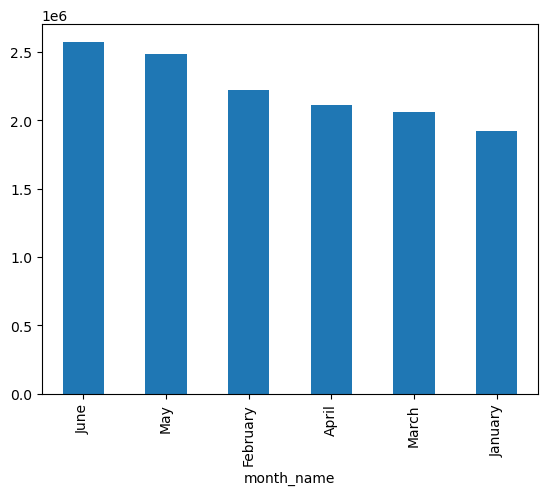

In [160]:
uber_month_pickups.plot(kind = 'bar')

### **2. Day wise Monthly Uber Pickups in NYC** 

In [161]:
uber_15['weekday'] = uber_15['Pickup_date'].dt.day_name()
uber_15['day'] = uber_15['Pickup_date'].dt.day

In [162]:
uber_15

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,month_name,weekday,day
0,B02617,2015-05-17 09:47:00,B02617,141,May,Sunday,17
1,B02617,2015-05-17 09:47:00,B02617,65,May,Sunday,17
2,B02617,2015-05-17 09:47:00,B02617,100,May,Sunday,17
3,B02617,2015-05-17 09:47:00,B02774,80,May,Sunday,17
4,B02617,2015-05-17 09:47:00,B02617,90,May,Sunday,17
...,...,...,...,...,...,...,...
14270474,B02765,2015-05-08 15:43:00,B02765,186,May,Friday,8
14270475,B02765,2015-05-08 15:43:00,B02765,263,May,Friday,8
14270476,B02765,2015-05-08 15:43:00,B02765,90,May,Friday,8
14270477,B02765,2015-05-08 15:44:00,B01899,45,May,Friday,8


In [163]:
day_wise_monthly_pickup = pd.crosstab(index = uber_15['month_name'], columns = uber_15['weekday'])

In [164]:
day_wise_monthly_pickup

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
month_name,,,,,,,
April,315002,238429,324545,273560,372522,250632,338015
February,373550,274948,368311,296130,335603,287260,286387
January,339285,190606,386049,230487,330319,196574,245650
June,371225,375312,399377,334434,357782,405500,328141
March,309631,269931,314785,313865,277026,320634,256767
May,430134,255501,464298,390391,337607,290004,316045


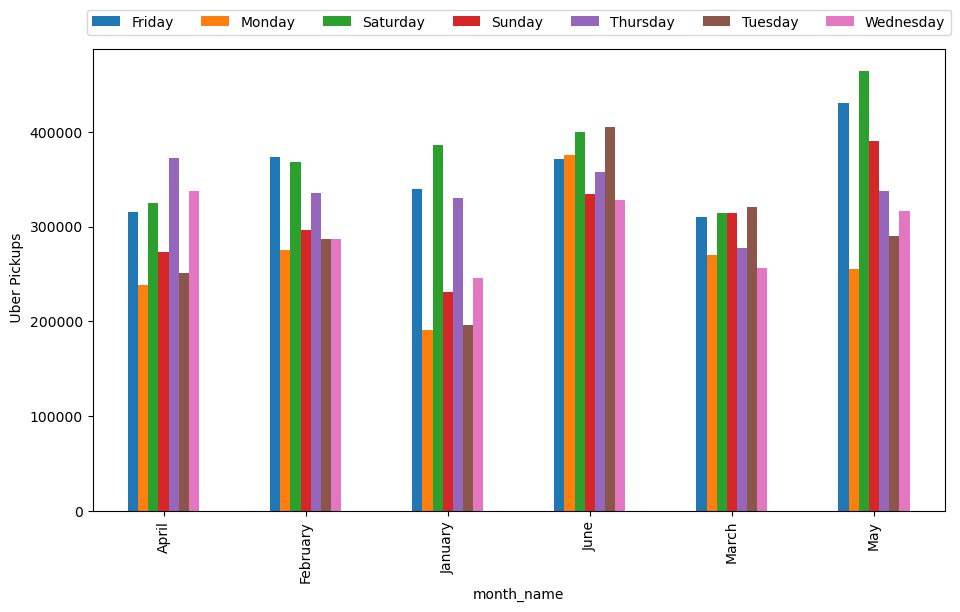

In [165]:
fig, ax = plt.subplots(figsize = (11,6))
day_wise_monthly_pickup.plot(kind = 'bar', ax = ax)
ax.set_ylabel(' Uber Pickups')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol= 7 )

plt.show()

### **3. Hourly Rush in NYC**

In [168]:
uber_15['hour'] = uber_15['Pickup_date'].dt.hour
uber_15['minutes'] = uber_15['Pickup_date'].dt.minute

In [169]:
uber_15.head(5)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,month_name,weekday,day,hour,minutes
0,B02617,2015-05-17 09:47:00,B02617,141,May,Sunday,17,9,47
1,B02617,2015-05-17 09:47:00,B02617,65,May,Sunday,17,9,47
2,B02617,2015-05-17 09:47:00,B02617,100,May,Sunday,17,9,47
3,B02617,2015-05-17 09:47:00,B02774,80,May,Sunday,17,9,47
4,B02617,2015-05-17 09:47:00,B02617,90,May,Sunday,17,9,47


In [170]:
daily_hourly_rush = uber_15.groupby(['weekday','hour'],as_index =  False).size()
daily_hourly_rush

,weekday,hour,size
0,Friday,0,79879
1,Friday,1,44563
2,Friday,2,27252
3,Friday,3,19076
4,Friday,4,23049
...,...,...,...
163,Wednesday,19,131317
164,Wednesday,20,123490
165,Wednesday,21,120941
166,Wednesday,22,115208


<Axes: xlabel='hour', ylabel='size'>

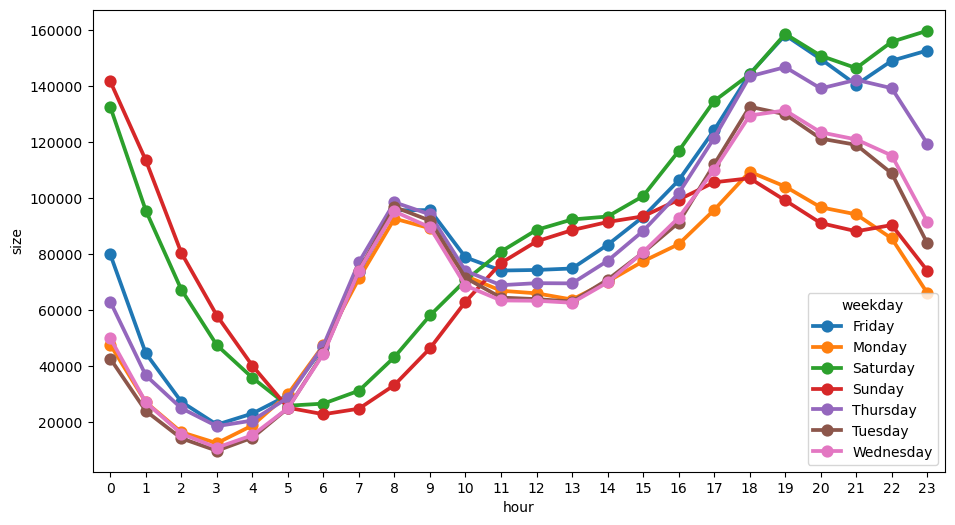

In [171]:
plt.figure(figsize = (11,6))

sborn.pointplot(x = "hour" , y = 'size', hue ='weekday' , data = daily_hourly_rush)


### **Peak Hour Rush**  
**Weekday Rush:** During weekdays, pickup demand begins to rise at 5 AM, reaching a peak at 8 AM with approximately 100,000 pickup requests. A secondary peak occurs around 6 PM, except on Fridays. On Fridays, the peak demand shifts to around 7 PM and remains high until midnight, similar to the pattern observed on Saturdays.

**Weekend Rush:** On weekends, the peak pickup demand typically occurs in the evening. Saturdays witness the highest peak at 7 PM, with up to 160,000 pickup requests, maintaining high demand levels until midnight. On Sundays, the rush peaks at 6 PM with around 100,000 pickup requests, gradually decreasing throughout the night.
#### **Pattern Analysis:**

**Morning Peak on Weekdays:** The morning peak is likely due to commuters starting their day, resulting in increased pickup requests.

**Evening Peak on Weekdays:** The evening peak, particularly around 6 PM, corresponds to the end of the workday, with commuters returning home. The later peak on Fridays aligns with extended social activities or weekend travel plans.

**Saturday High Demand:** Saturday evenings have the highest demand, likely due to social outings, events, and leisure activities.

**Sunday Evening Peak:** Sunday evenings see a peak as people prepare for the upcoming workweek, leading to increased travel before winding down for the night.

### **4. Base with most active Ubers**


In [172]:
uber_15

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,month_name,weekday,day,hour,minutes
0,B02617,2015-05-17 09:47:00,B02617,141,May,Sunday,17,9,47
1,B02617,2015-05-17 09:47:00,B02617,65,May,Sunday,17,9,47
2,B02617,2015-05-17 09:47:00,B02617,100,May,Sunday,17,9,47
3,B02617,2015-05-17 09:47:00,B02774,80,May,Sunday,17,9,47
4,B02617,2015-05-17 09:47:00,B02617,90,May,Sunday,17,9,47
...,...,...,...,...,...,...,...,...,...
14270474,B02765,2015-05-08 15:43:00,B02765,186,May,Friday,8,15,43
14270475,B02765,2015-05-08 15:43:00,B02765,263,May,Friday,8,15,43
14270476,B02765,2015-05-08 15:43:00,B02765,90,May,Friday,8,15,43
14270477,B02765,2015-05-08 15:44:00,B01899,45,May,Friday,8,15,44


In [174]:
uber_foil = pd.read_csv(file_path + "Uber-Jan-Feb-FOIL.csv")

In [175]:
uber_foil

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537
...,...,...,...,...
349,B02764,2/28/2015,3952,39812
350,B02617,2/28/2015,1372,14022
351,B02682,2/28/2015,1386,14472
352,B02512,2/28/2015,230,1803


In [176]:
uber_foil['dispatching_base_number'].value_counts()

dispatching_base_number
B02512    59
B02765    59
B02764    59
B02682    59
B02617    59
B02598    59
Name: count, dtype: int64

In [33]:
!pip install chart_studio

In [34]:
!pip install plotly

In [36]:
import chart_studio.plotly as cspy
import plotly.graph_objs as pgo
import plotly.express as px
from plotly.offline import download_plotlyjs , init_notebook_mode, plot , iplot

In [37]:
init_notebook_mode(connected = True)

In [177]:
uber_foil.columns

Index(['dispatching_base_number', 'date', 'active_vehicles', 'trips'], dtype='object')

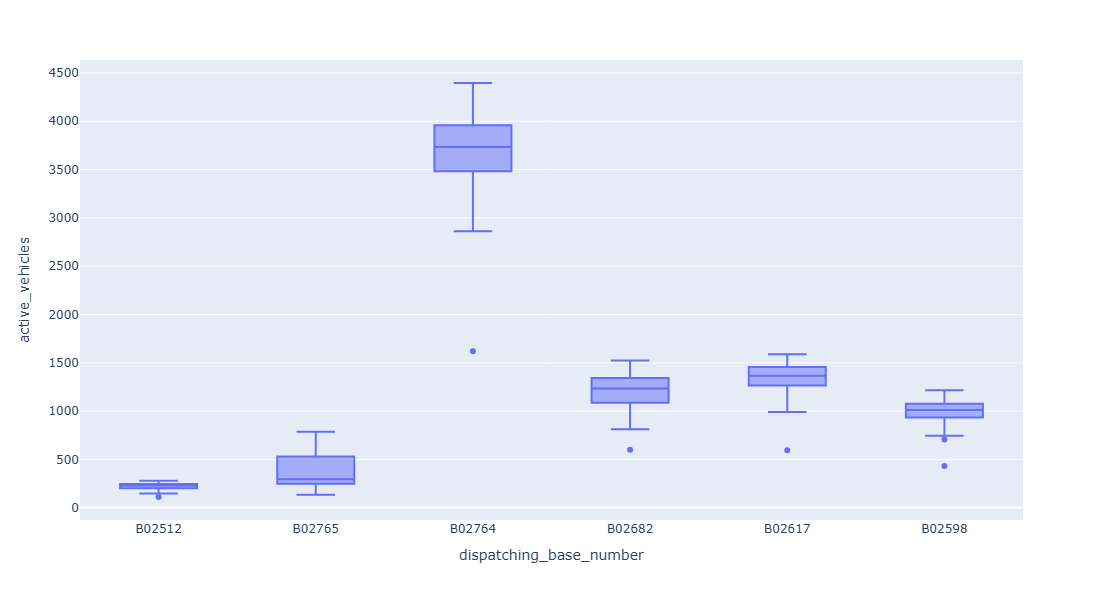

In [178]:
px.box(data_frame = uber_foil, x = 'dispatching_base_number', y = 'active_vehicles',width = 600, height = 600)

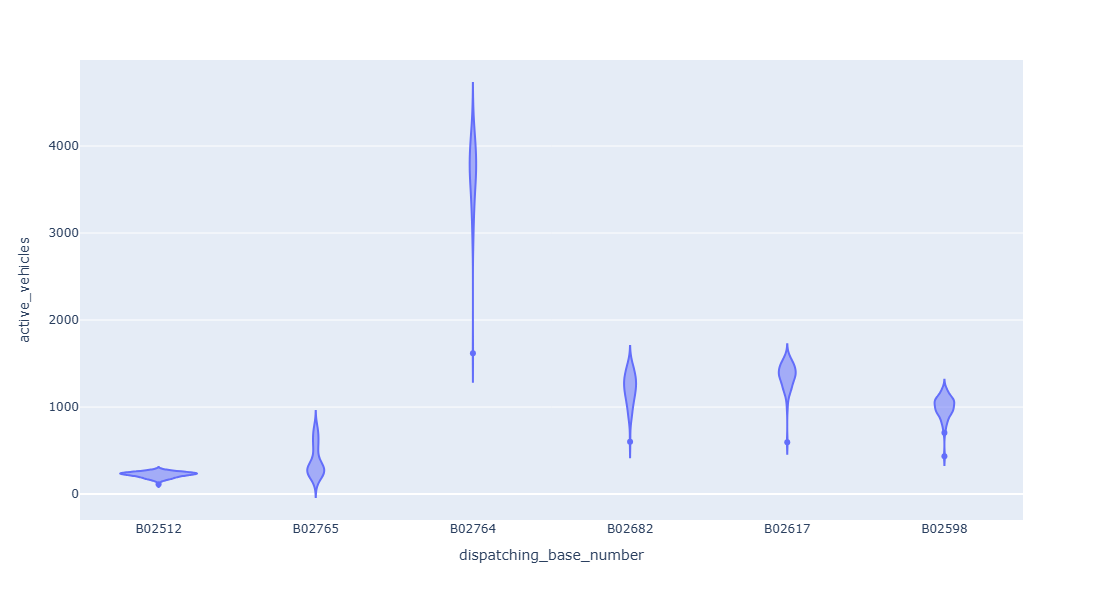

In [179]:
px.violin(data_frame = uber_foil, x = 'dispatching_base_number', y = 'active_vehicles', width = 800, height = 600)

In [192]:
uber_file= uber_file.drop(index = 2)

In [195]:
uber_files_list.pop(2)

'..\\..\\Datasets\\uber_pickup_nyc\\uber-raw-data-janjune-15.csv'

In [196]:
uber_files_list

['..\\..\\Datasets\\uber_pickup_nyc\\uber-raw-data-apr14.csv',
 '..\\..\\Datasets\\uber_pickup_nyc\\uber-raw-data-aug14.csv',
 '..\\..\\Datasets\\uber_pickup_nyc\\uber-raw-data-jul14.csv',
 '..\\..\\Datasets\\uber_pickup_nyc\\uber-raw-data-jun14.csv',
 '..\\..\\Datasets\\uber_pickup_nyc\\uber-raw-data-may14.csv',
 '..\\..\\Datasets\\uber_pickup_nyc\\uber-raw-data-sep14.csv']

### **Combining all the raw Files data and Transform**


In [209]:
data_dfs = []
for file in uber_files_list:
    uber_monthly_data_df = pd.read_csv(file)
    data_dfs.append(uber_monthly_data_df)
uber_combined_raw_data_df = pd.concat(data_dfs, ignore_index = True)

In [205]:
uber_combined_raw_data_df.duplicated().sum()

82581

In [206]:
uber_combined_raw_data_df.drop_duplicates(inplace = True)

In [208]:
uber_combined_raw_data_df.head(5)

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [211]:
 uber_rush_location = uber_combined_raw_data_df.groupby(['Lat','Lon'], as_index = False).size()

In [212]:
!pip install folium

In [213]:
import folium

In [254]:
from folium.plugins import HeatMap


In [264]:
basemap3 = folium.Map()

In [265]:
HeatMap(uber_rush_location).add_to(basemap3)


In [267]:
basemap3

In [268]:
uber_combined_raw_data_df.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [269]:
uber_combined_raw_data_df['Date/Time'][0]

'4/1/2014 0:11:00'

In [272]:
uber_combined_raw_data_df['Date/Time'] = pd.to_datetime(uber_combined_raw_data_df['Date/Time'], format = "%m/%d/%Y %H:%M:%S")

In [274]:
uber_combined_raw_data_df['day'] = uber_combined_raw_data_df['Date/Time'].dt.day
uber_combined_raw_data_df['hour'] = uber_combined_raw_data_df['Date/Time'].dt.hour

In [275]:
uber_combined_raw_data_df

,Date/Time,Lat,Lon,Base,day,hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,0
...,...,...,...,...,...,...
4534322,2014-09-30 22:57:00,40.7668,-73.9845,B02764,30,22
4534323,2014-09-30 22:57:00,40.6911,-74.1773,B02764,30,22
4534324,2014-09-30 22:58:00,40.8519,-73.9319,B02764,30,22
4534325,2014-09-30 22:58:00,40.7081,-74.0066,B02764,30,22


In [276]:
uber_combined_raw_data_df.groupby(['day','hour'], as_index = False).size()

,day,hour,size
0,1,0,3247
1,1,1,1982
2,1,2,1284
3,1,3,1331
4,1,4,1458
...,...,...,...
739,31,19,5001
740,31,20,4923
741,31,21,5171
742,31,22,5244


In [279]:
pivot = uber_combined_raw_data_df.groupby(['day','hour']).size().unstack()

In [280]:
pivot.style.background_gradient()

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,,,,
1,3247,1982,1284,1331,1458,2171,3717,5470,5376,4688,4680,4811,5018,5887,7050,8033,8760,9661,8727,8146,7448,7960,6397,4128
2,2480,1600,1109,1442,1897,2861,5002,6646,6420,4795,4886,5067,5278,5801,7021,8581,10267,11301,11326,9654,8903,8506,7111,5247
3,3415,2176,1434,1489,1578,2437,4318,5775,5482,4732,4864,5162,5462,6189,7327,8991,10472,10665,11433,9765,9158,8646,7246,4767
4,2944,1718,1217,1449,1737,2623,4687,6146,5799,4814,4822,5067,5289,6273,7307,8678,9661,10550,10458,9296,8508,8804,7852,5224
5,2786,1567,1047,1278,1648,2958,4919,6379,6580,5616,5225,5097,5129,5780,7072,8453,9770,10887,10324,9582,9512,9785,9020,6640
6,4623,2932,1902,1599,1584,2201,3705,4846,5009,4482,4891,5264,5528,6378,7353,8751,9615,10130,9437,8575,8286,8734,8000,6061
7,3715,2326,1533,1622,1793,2464,4172,5649,5459,4706,4982,5266,5455,6315,7418,8624,10585,11185,10767,9674,8862,8692,7337,4902
8,2882,1672,1147,1509,1921,3282,5528,7474,7472,5770,5368,5433,5576,6424,7356,8910,10007,10871,9874,8964,8768,8528,6917,4331
9,2708,1757,1246,1501,1911,3227,5910,7720,7641,5983,5500,5542,5607,6540,7997,9360,10419,12116,11677,9979,9061,8806,7637,5290


In [281]:
def gen_pivot_table(df ,col1,col2):
    pivot = df.groupby([col1,col2]).size().unstack()
    return pivot.style.background_gradient()
    

In [284]:
uber_combined_raw_data_df

,Date/Time,Lat,Lon,Base,day,hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,0
...,...,...,...,...,...,...
4534322,2014-09-30 22:57:00,40.7668,-73.9845,B02764,30,22
4534323,2014-09-30 22:57:00,40.6911,-74.1773,B02764,30,22
4534324,2014-09-30 22:58:00,40.8519,-73.9319,B02764,30,22
4534325,2014-09-30 22:58:00,40.7081,-74.0066,B02764,30,22


In [283]:
gen_pivot_table(uber_combined_raw_data_df, "day","hour")

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,,,,
1,3247,1982,1284,1331,1458,2171,3717,5470,5376,4688,4680,4811,5018,5887,7050,8033,8760,9661,8727,8146,7448,7960,6397,4128
2,2480,1600,1109,1442,1897,2861,5002,6646,6420,4795,4886,5067,5278,5801,7021,8581,10267,11301,11326,9654,8903,8506,7111,5247
3,3415,2176,1434,1489,1578,2437,4318,5775,5482,4732,4864,5162,5462,6189,7327,8991,10472,10665,11433,9765,9158,8646,7246,4767
4,2944,1718,1217,1449,1737,2623,4687,6146,5799,4814,4822,5067,5289,6273,7307,8678,9661,10550,10458,9296,8508,8804,7852,5224
5,2786,1567,1047,1278,1648,2958,4919,6379,6580,5616,5225,5097,5129,5780,7072,8453,9770,10887,10324,9582,9512,9785,9020,6640
6,4623,2932,1902,1599,1584,2201,3705,4846,5009,4482,4891,5264,5528,6378,7353,8751,9615,10130,9437,8575,8286,8734,8000,6061
7,3715,2326,1533,1622,1793,2464,4172,5649,5459,4706,4982,5266,5455,6315,7418,8624,10585,11185,10767,9674,8862,8692,7337,4902
8,2882,1672,1147,1509,1921,3282,5528,7474,7472,5770,5368,5433,5576,6424,7356,8910,10007,10871,9874,8964,8768,8528,6917,4331
9,2708,1757,1246,1501,1911,3227,5910,7720,7641,5983,5500,5542,5607,6540,7997,9360,10419,12116,11677,9979,9061,8806,7637,5290
